# AI 306 - Data Mining Course's Project 
# Implement and Design a System for Analyzing Consumer’s Online Buying Behavior

---
By the students:
- Waad Alhejali 4110091
- Zainab Abdelhadi 4111296

Supervised by:
- Ms. Marwa Alrehli

---




## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import random
import seaborn as sns
color = sns.color_palette()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading The Data

In [3]:
aisles = pd.read_csv('aisles.csv')
dep = pd.read_csv('departments.csv')
or_prior= pd.read_csv('order_products__prior.csv')
orde=pd.read_csv('orders.csv')
proud=pd.read_csv('products.csv')

## Data Cleaning

In [4]:
aisles.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      aisle_id  aisle
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
..        ...    ...
129     False  False
130     False  False
131     False  False
132     False  False
133     False  False

[134 rows x 2 columns]>

In [5]:
dep.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     department_id  department
0           False       False
1           False       False
2           False       False
3           False       False
4           False       False
5           False       False
6           False       False
7           False       False
8           False       False
9           False       False
10          False       False
11          False       False
12          False       False
13          False       False
14          False       False
15          False       False
16          False       False
17          False       False
18          False       False
19          False       False
20          False       False>

In [6]:
or_prior.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         order_id  product_id  add_to_cart_order  reordered
0          False       False              False      False
1          False       False              False      False
2          False       False              False      False
3          False       False              False      False
4          False       False              False      False
...          ...         ...                ...        ...
656569     False       False              False      False
656570     False       False              False      False
656571     False       False              False      False
656572     False       False              False      False
656573     False        True               True       True

[656574 rows x 4 columns]>

In [7]:
orde.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         order_id  user_id  eval_set  order_number  order_dow  \
0          False    False     False         False      False   
1          False    False     False         False      False   
2          False    False     False         False      False   
3          False    False     False         False      False   
4          False    False     False         False      False   
...          ...      ...       ...           ...        ...   
707252     False    False     False         False      False   
707253     False    False     False         False      False   
707254     False    False     False         False      False   
707255     False    False     False         False      False   
707256     False    False     False          True       True   

        order_hour_of_day  days_since_prior_order  
0                   False                    True  
1                   False                   False  
2            

In [8]:
proud.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        product_id  product_name  aisle_id  department_id
0           False         False     False          False
1           False         False     False          False
2           False         False     False          False
3           False         False     False          False
4           False         False     False          False
...           ...           ...       ...            ...
49683       False         False     False          False
49684       False         False     False          False
49685       False         False     False          False
49686       False         False     False          False
49687       False         False     False          False

[49688 rows x 4 columns]>

if there is any null value drop it

In [9]:
aisles.dropna()
dep.dropna()
or_prior.dropna()
orde.dropna()
proud.dropna()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [10]:
aisles.drop_duplicates()
dep.drop_duplicates()
or_prior.drop_duplicates()
orde.drop_duplicates()
proud.drop_duplicates()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


## Understanding the data

In [11]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
print(or_prior.shape)
or_prior.head(10)

(656574, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0
5,2,17794.0,6.0,1.0
6,2,40141.0,7.0,1.0
7,2,1819.0,8.0,1.0
8,2,43668.0,9.0,0.0
9,3,33754.0,1.0,1.0


In [13]:
print(orde.shape)
orde.head()

(707257, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,NaN
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0


In [14]:
print(proud.shape)
proud.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
print(dep.shape)
dep.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### How the ordering habit changes with day of week.

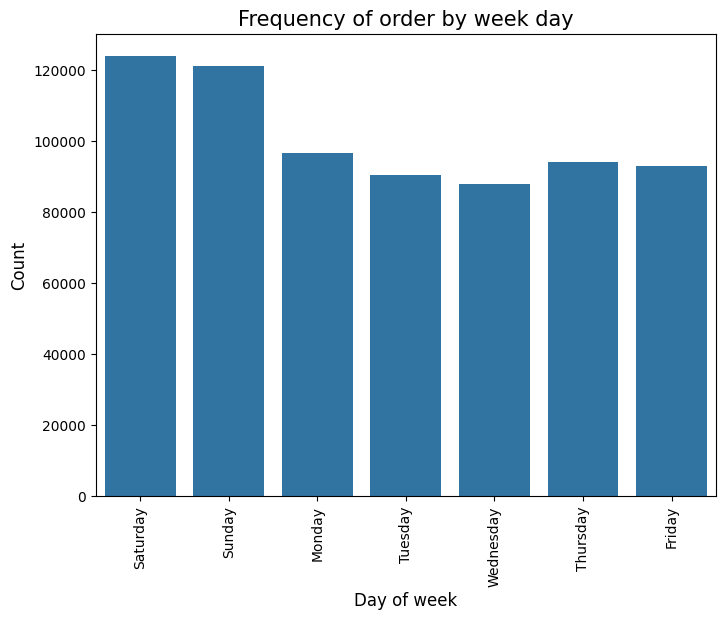

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x="order_dow", data=orde, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(np.arange(7), ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

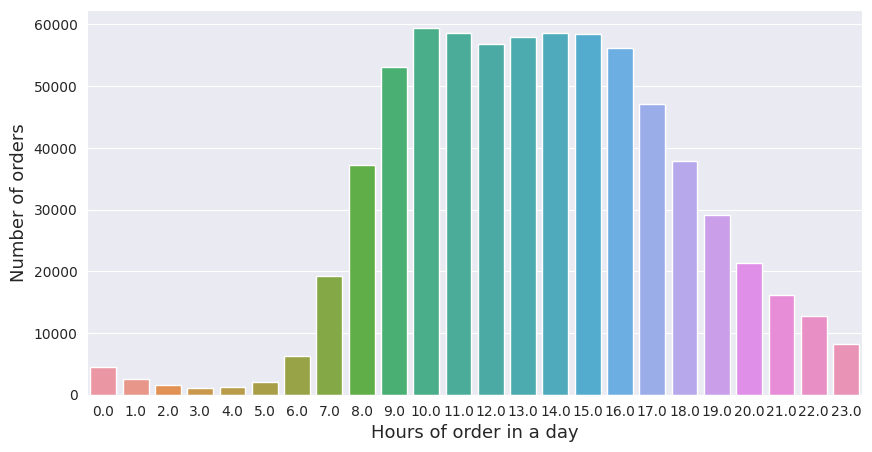

In [46]:
grouped = orde.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

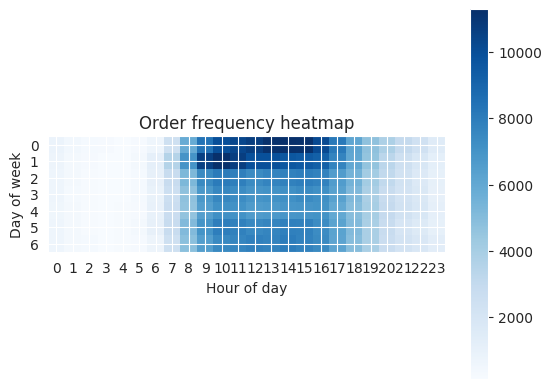

In [19]:
# Count the number of orders per day of week and hour of day
orders_by_dow_and_hour = orde.groupby(["order_dow", "order_hour_of_day"])["order_id"].count().reset_index()

# Pivot the table to create a heatmap of order frequency by day of week and hour of day
orders_heatmap = orders_by_dow_and_hour.pivot("order_dow", "order_hour_of_day", "order_id")
plt.imshow(orders_heatmap, cmap="Blues")
plt.colorbar()
plt.xticks(range(24))
plt.yticks(range(7))
plt.xlabel("Hour of day")
plt.ylabel("Day of week")
plt.title("Order frequency heatmap")
plt.show()

### Do people usually reorder the same previous ordered products ?

In [40]:
grouped = or_prior.groupby("reordered")["product_id"].agg(Total_products='count').reset_index()
grouped['Ratios'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped['Ratios']= round(grouped['Ratios'],3)
grouped

,reordered,Total_products,Ratios
0,0.0,268759,0.409
1,1.0,387814,0.591


59 % of ordered products are previously ordered by customers.

### Most ordered Products

In [41]:
grouped = or_prior.groupby("product_id")["reordered"].count().reset_index()
grouped = pd.merge(grouped, proud[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='reordered', ascending=False)[:10]
grouped

,product_id,reordered,product_name
15762,24852.0,9712,Banana
8270,13176.0,7797,Bag of Organic Bananas
13362,21137.0,5327,Organic Strawberries
13868,21903.0,4918,Organic Baby Spinach
29937,47209.0,4355,Organic Hass Avocado
30293,47766.0,3527,Organic Avocado
30204,47626.0,3089,Large Lemon
10609,16797.0,2859,Strawberries
16618,26209.0,2824,Limes
17732,27966.0,2782,Organic Raspberries


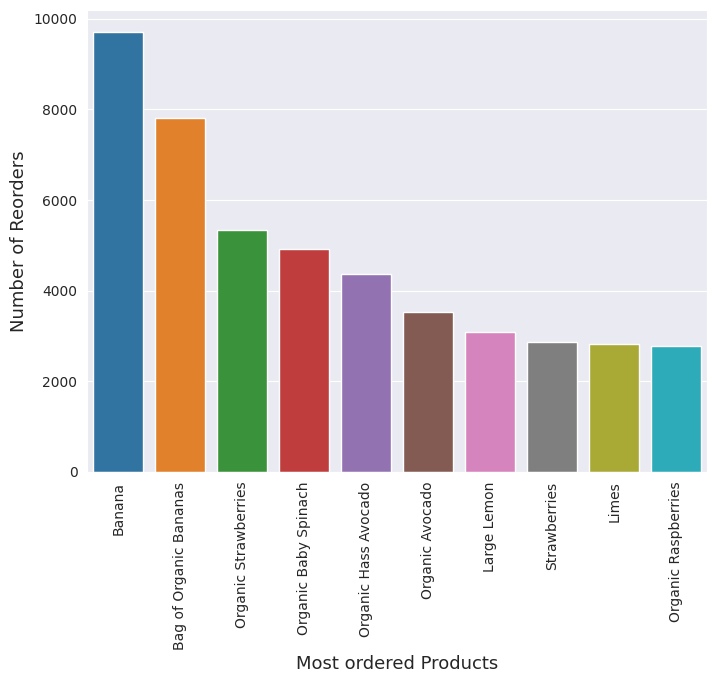

In [42]:
grouped = grouped.groupby('product_name').sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

### Most Reordered Products

In [50]:
grouped = or_prior.groupby("product_id").agg(reorder_sum=('reordered', 'sum'),
                                             reorder_total=('reordered', 'count')).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
grouped = pd.merge(grouped, proud[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped

,product_id,reorder_sum,reorder_total,reorder_probability,product_name
28854,45504.0,184.0,200,0.920000,Whole Organic Omega 3 Milk
1725,2748.0,94.0,105,0.895238,Organic Reduced Fat Omega-3 Milk
18668,29447.0,388.0,446,0.869955,"Milk, Organic, Vitamin D"
21704,34197.0,104.0,121,0.859504,Goat Milk
8865,14084.0,307.0,359,0.855153,Organic Unsweetened Vanilla Almond Milk
24541,38689.0,593.0,696,0.852011,Organic Reduced Fat Milk
28572,45051.0,66.0,78,0.846154,Pub Mix
27522,43394.0,145.0,172,0.843023,Organic Lactose Free Whole Milk
8262,13166.0,229.0,272,0.841912,"Organic Milk Reduced Fat, 2% Milkfat"
15762,24852.0,8162.0,9712,0.840404,Banana


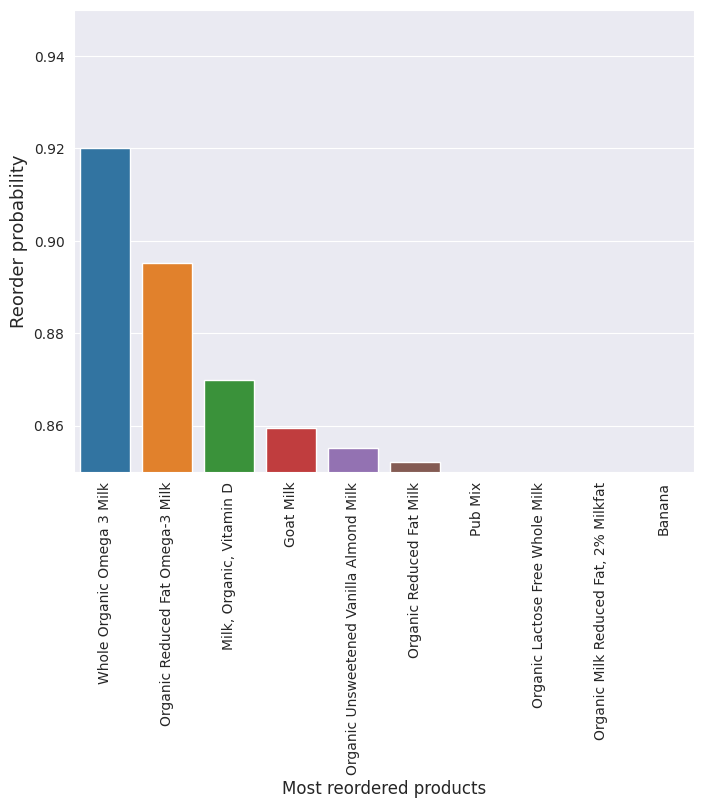

In [51]:
grouped  = grouped.groupby(['product_name']).sum()['reorder_probability'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()

# Let's check the total number of unique customers

In [52]:
print("Number of unique customers in the whole dataset : ",len(set(orde.user_id)))

Number of unique customers in the whole dataset :  42600


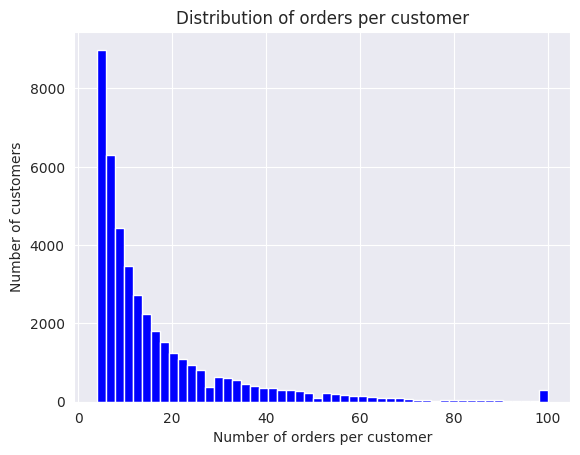

In [53]:
# Count the number of orders for each customer
orders_per_customer = orde.groupby("user_id")["order_number"].max()

# Create a histogram of the number of orders per customer
plt.hist(orders_per_customer, bins=50, color='blue')
plt.xlabel("Number of orders per customer")
plt.ylabel("Number of customers")
plt.title("Distribution of orders per customer")
plt.show()

# Analyzing Behaviour of users

### Association Rules Mining

Market Basket Analysis:

In [54]:
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [55]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = or_prior.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

order_id
2    33120.0
2    28985.0
2     9327.0
2    45918.0
2    30035.0
2    17794.0
2    40141.0
2     1819.0
2    43668.0
3    33754.0
Name: item_id, dtype: float64

pandas.core.series.Series

##### Helper functions to the main association rules function

In [56]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().values
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]  

#### Association rules function

In [57]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

#### Association Rules Mining

In [58]:
%%time
rules = association_rules(orders, 0.01)  

Starting order_item:                 656574
Items with support >= 0.01:           11122
Remaining order_item:                608776
Remaining orders with 2+ items:       61116
Remaining order_item:                605082
Item pairs:                         2634576
Item pairs with support >= 0.01:      51125

CPU times: user 8.3 s, sys: 487 ms, total: 8.79 s
Wall time: 8.84 s


In [59]:
item_name = proud.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('freqAB', ascending=False)
top_5_rules = rules_final.head(5)
display(top_5_rules)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
1391,Banana,Organic Strawberries,848,1.387525,9666,15.815826,5302,8.675306,0.087730,0.159940,0.010113
1231,Bag of Organic Bananas,Organic Strawberries,796,1.302441,7746,12.674259,5302,8.675306,0.102763,0.150132,0.011845
466,Bag of Organic Bananas,Organic Hass Avocado,759,1.241901,7746,12.674259,4346,7.111067,0.097986,0.174643,0.013779
4857,Bag of Organic Bananas,Organic Baby Spinach,737,1.205904,7746,12.674259,4889,7.999542,0.095146,0.150747,0.011894
5017,Banana,Organic Baby Spinach,734,1.200995,9666,15.815826,4889,7.999542,0.075936,0.150133,0.009493


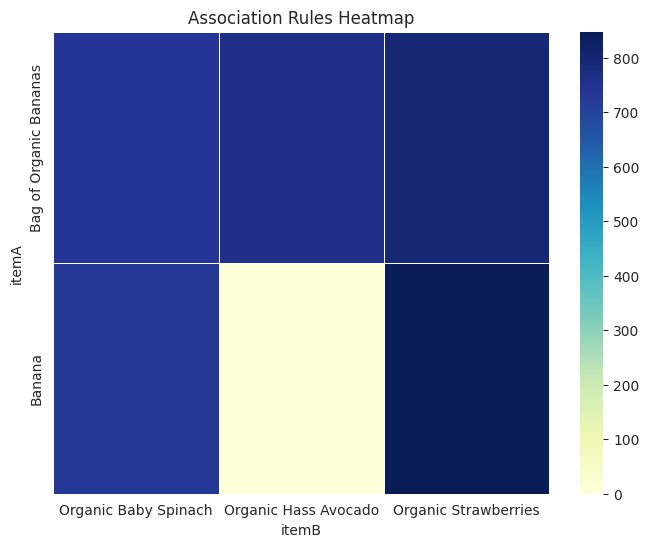

In [60]:
# create a pivot table of the frequency of item pairs
item_pairs = top_5_rules[['itemA', 'itemB', 'freqAB']]
pivot_table = item_pairs.pivot(index='itemA', columns='itemB', values='freqAB').fillna(0)

# create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='YlGnBu',fmt='.1f', linewidths=.5)
plt.title('Association Rules Heatmap')
plt.show()

In [61]:
# Merging the Prior and train order_products
#order_products = pd.concat([order_products_train, order_products_prior])
order_products = or_prior.merge(proud, on='product_id', how='left').merge(orde, on='order_id', how='left').merge(dep, on='department_id').merge(aisles, on='aisle_id')

# Count of total orders
total_orders = order_products['order_id'].nunique()
print('Count of total orders: ', total_orders)

print('Merging products, order_products, and orders tables...')

order_products.head()

Count of total orders:  65184
Merging products, order_products, and orders tables...


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120.0,1.0,1.0,Organic Egg Whites,86.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,dairy eggs,eggs
1,22,23341.0,6.0,1.0,Large Grade AA Eggs,86.0,16.0,30822.0,prior,25.0,1.0,8.0,12.0,dairy eggs,eggs
2,25,6383.0,7.0,1.0,All Whites 100% Egg Whites,86.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,dairy eggs,eggs
3,26,33120.0,5.0,0.0,Organic Egg Whites,86.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,dairy eggs,eggs
4,55,11520.0,12.0,0.0,Large Alfresco Eggs,86.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,dairy eggs,eggs


Users always order previously ordered products:

Count of users: 971

In [ ]:
# Getting list of user ids, who always reorder products from their first order.
non_first_orders_mask = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders_mask].groupby(['user_id']).agg({'reordered':'mean', 'order_number':'count'}).rename(columns={'reordered':'reordered_ratio'})
mask = groupeddf['reordered_ratio'] == 1
always_reorder_users_id = groupeddf[mask].index.to_list()
print('Count of users who always order the same products every time:', len(always_reorder_users_id))

# getting the orders of the a random user
rand_indx = random.randint(0,len(always_reorder_users_id))
rand_user_id = always_reorder_users_id[rand_indx]
user_mask = orde['user_id'] == rand_user_id
user_orders = orde[user_mask]['order_id'].to_list()
print(f'Orders of user {rand_user_id}:')
print(f'Count of his orders: {len(user_orders)}')
for order_id in user_orders:
    print(f'Order number{order_id}:')
    print(order_products[order_products['order_id'] == order_id]['product_name'].to_list())
    print('--------------')
del groupeddf, mask, always_reorder_users_id

Probability of reordering a product

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# For each product what is its probability to be reordered.
# We don't consider the first order of the user because 100% it won't contain any prev. ordered products.
non_first_orders_Mask = order_products['order_number'] != 1
groupeddf = order_products[non_first_orders_Mask].groupby('product_name').agg({'order_id':'count','reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio', 'order_id':'orders_count'})

# Filter products under 10000 order count
groupeddf = groupeddf[groupeddf['orders_count']>10000]
# Sort by the products having highest prob to be reordered
groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)

if len(groupeddf) >= 30: # check if there are at least 30 rows in groupeddf
    fig, ax = plt.subplots()
    ax = groupeddf.iloc[:30].plot.bar(x='product_name', y='reordered_ratio', ax=ax)
    plt.xlabel('30 most first ordered products')
    plt.ylabel('probability of being reordered')
    plt.xticks(rotation=90)
    plt.title('Probability of reordering a product')
    ax.set_yticks(np.arange(0.0, 1.0, 0.1))
    plt.show()

organic_reduced_fat_milk_purchases_mask = order_products['product_name']=='Organic Reduced Fat Milk'
organic_reduced_fat_milk_non_first_purchases_mask = organic_reduced_fat_milk_purchases_mask & order_products['reordered']==1
print(f'Count of total Organic Reduced Fat Milk purchases: {order_products[organic_reduced_fat_milk_purchases_mask].count().sum()}')
print(f'Count of reordered Organic Reduced Fat Milk purchases: {order_products[organic_reduced_fat_milk_non_first_purchases_mask].count().sum()}')

Count of total Organic Reduced Fat Milk purchases: 7150
Count of reordered Organic Reduced Fat Milk purchases: 6093


Analyzing Organic Prodcuts

10% of instacart's products are organic products
31.5% of bought products are organic products
85.38% probability of reordering an organic products.
81% probability of reordering an non-organic products.

No significance pattern of when organic products are bought most, than when products in general are bought most.

### Most important Departments (by number of products)

In [69]:
items  = pd.merge(left =pd.merge(left=proud, right=dep, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [70]:
grouped = items.groupby("department").size().reset_index(name='Total_products')
grouped['Ratio'] = grouped['Total_products'] / grouped['Total_products'].sum()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

,department,Total_products,Ratio
17,personal care,6563,0.132084
20,snacks,6264,0.126067
16,pantry,5371,0.108095
3,beverages,4365,0.087848
10,frozen,4007,0.080643
7,dairy eggs,3449,0.069413
11,household,3085,0.062087
6,canned goods,2092,0.042103
9,dry goods pasta,1858,0.037393
19,produce,1684,0.033891


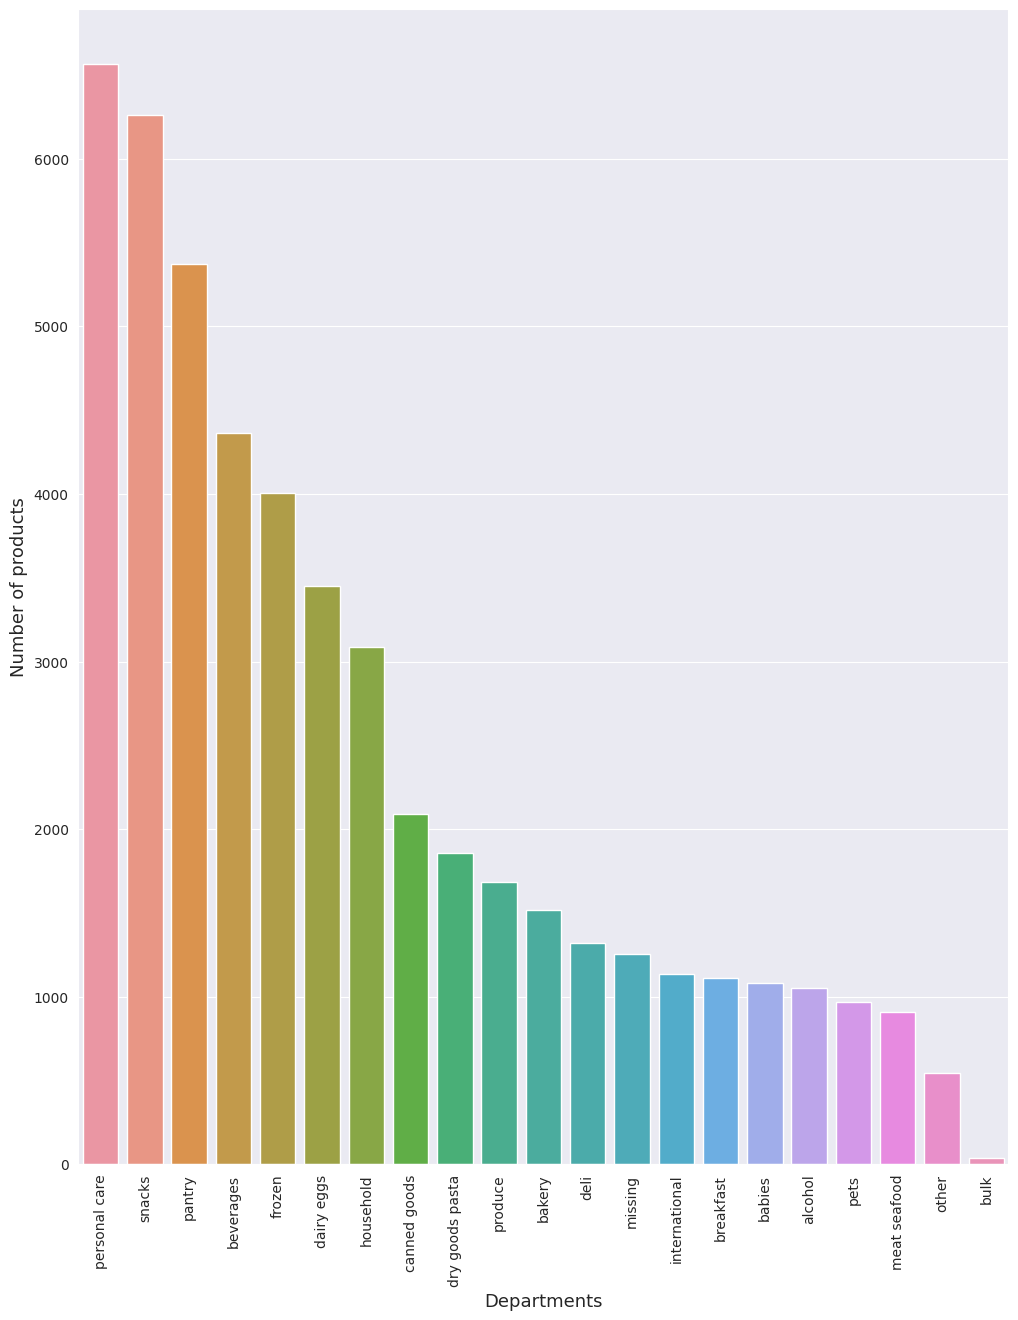

In [71]:
grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

### Most important Aisles in each Department (by number of Products)

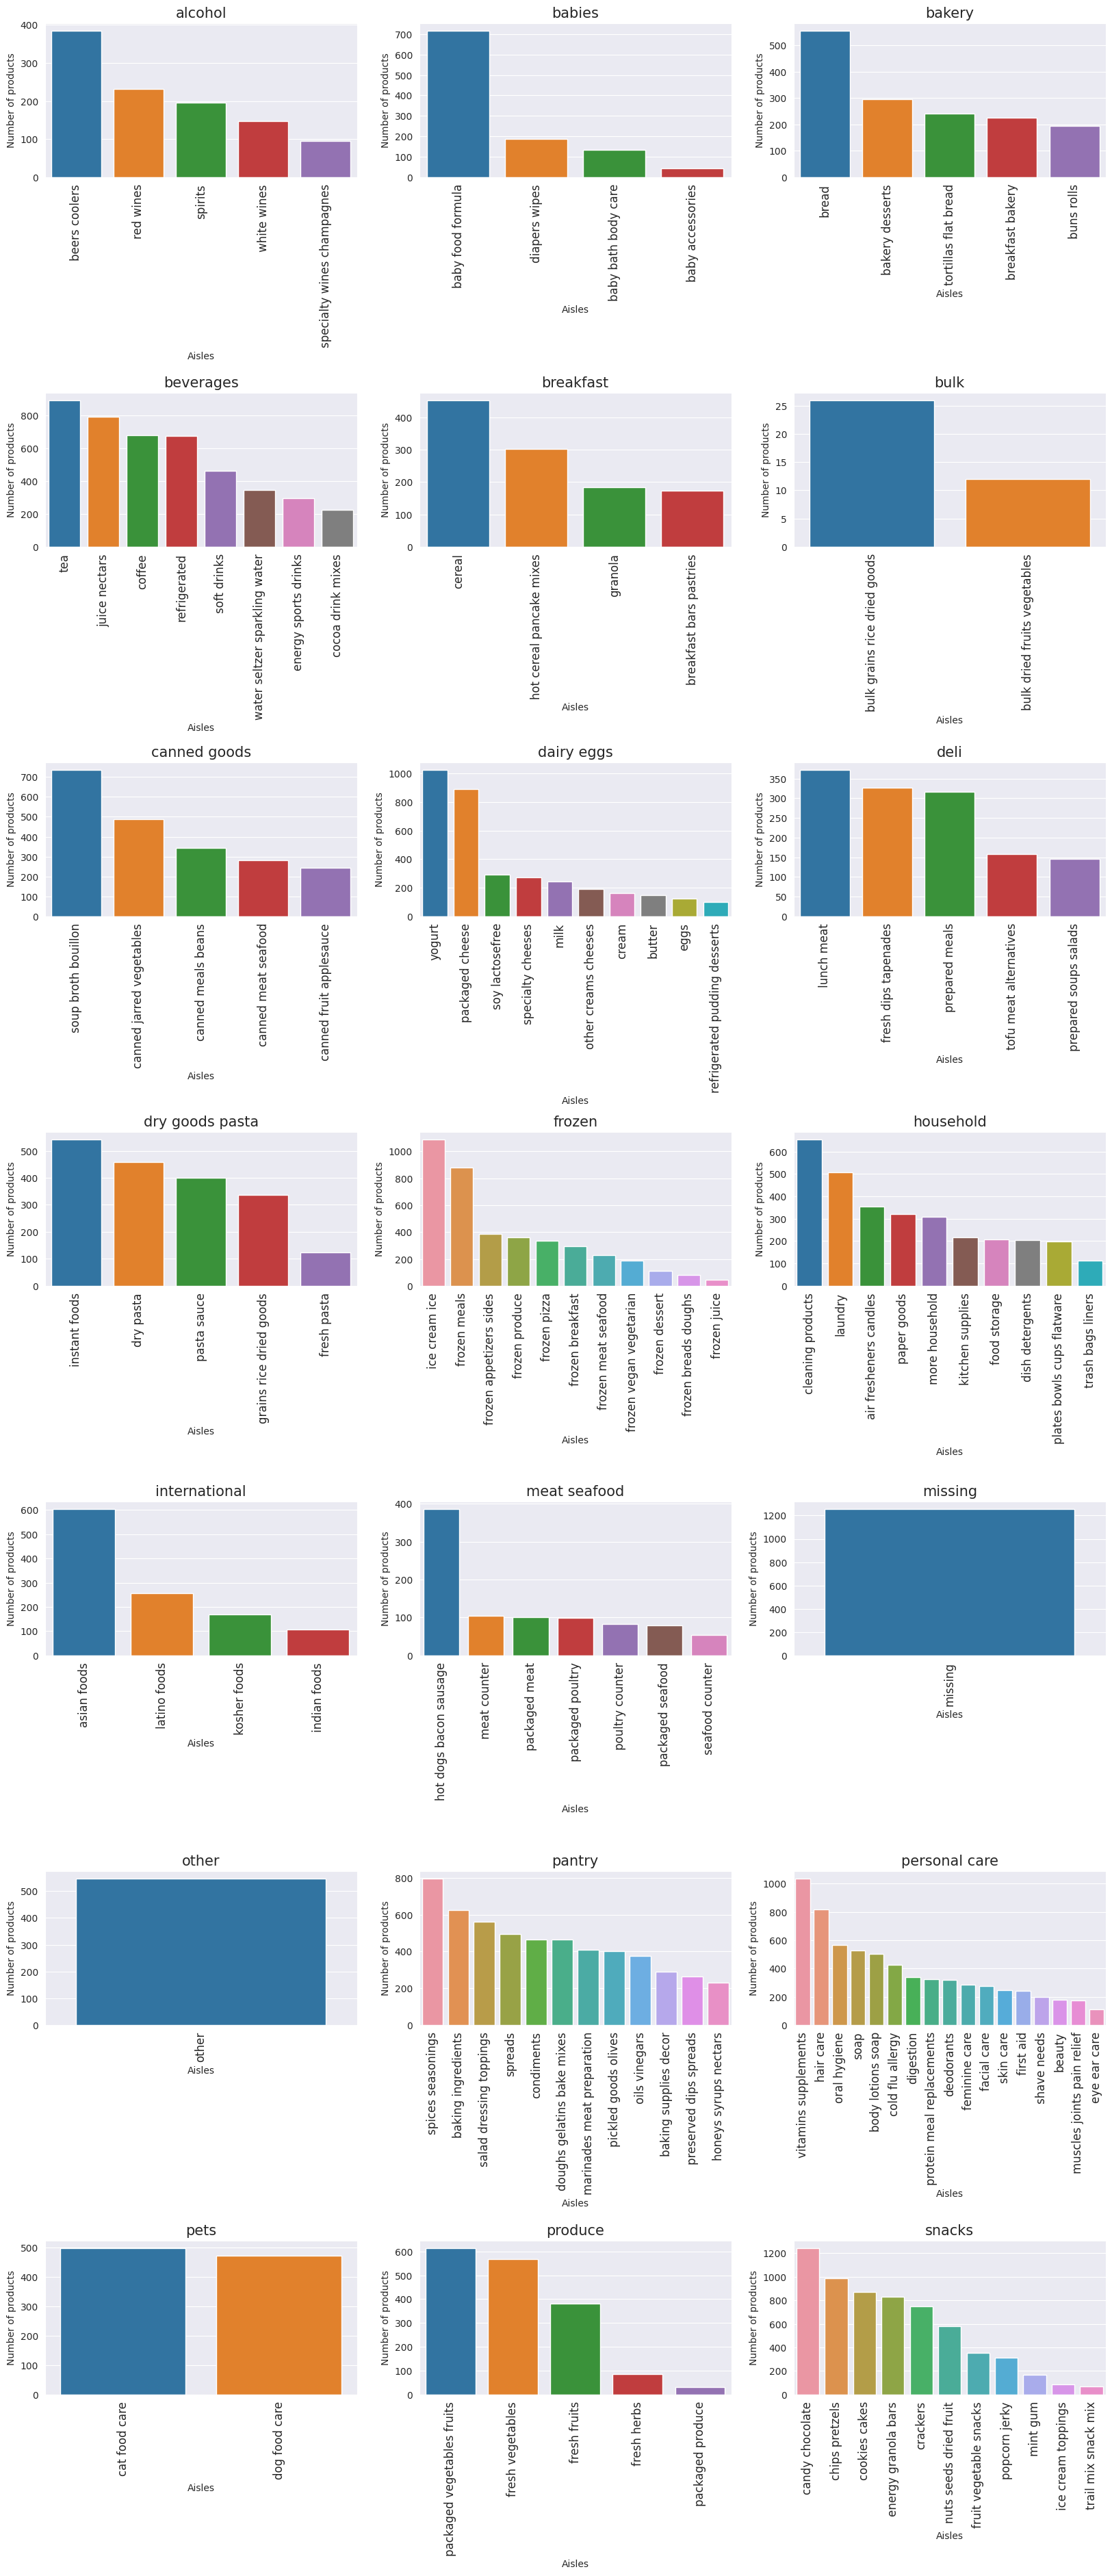

In [73]:
grouped = items.groupby(["department", "aisle"]).size().reset_index(name='Total_products')
grouped.sort_values('Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw=dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(x=group.aisle, y=group.Total_products, ax=ax)
    ax.set(xlabel="Aisles", ylabel="Number of products")
    g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

### Most important Aisles over all Departments (by number of Products)

In [77]:
grouped = items.groupby("aisle")["product_id"].size().reset_index(name='Total_products')
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped = grouped.sort_values(by='Total_products', ascending=False)[:20]
grouped

,aisle,Total_products,Ratio
85,missing,1258,0.025318
18,candy chocolate,1246,0.025076
71,ice cream ice,1091,0.021957
130,vitamins supplements,1038,0.020890
133,yogurt,1026,0.020649
25,chips pretzels,989,0.019904
125,tea,894,0.017992
93,packaged cheese,891,0.017932
59,frozen meals,880,0.017711
31,cookies cakes,874,0.017590


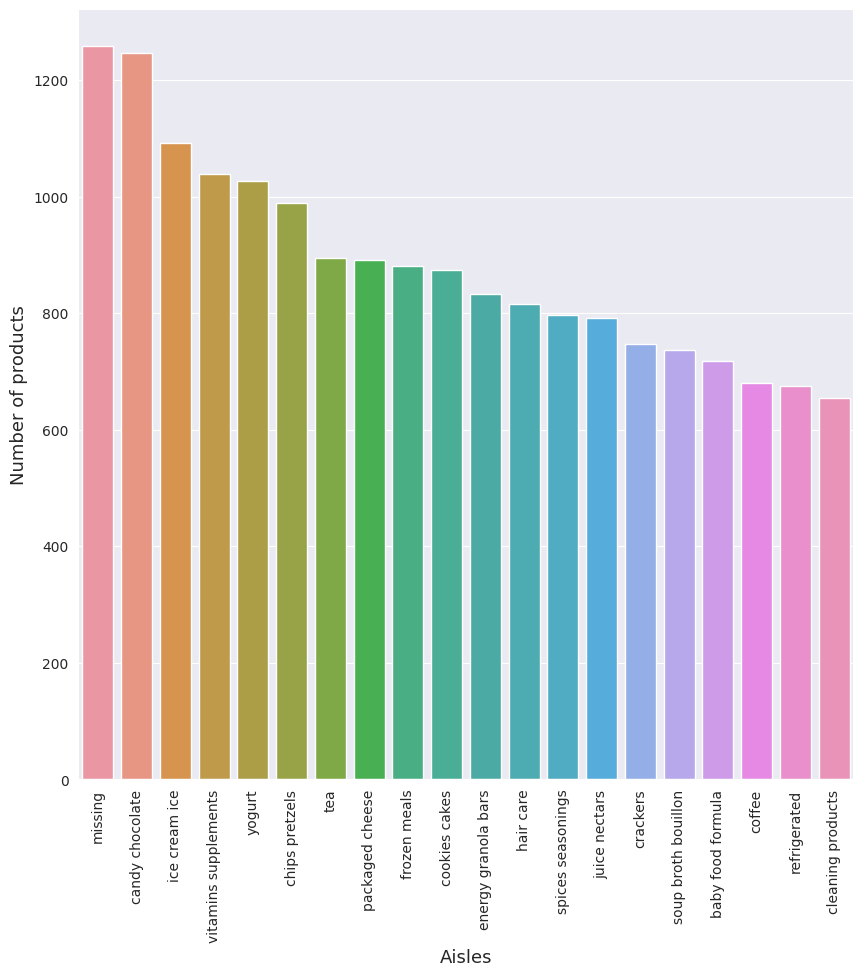

In [78]:
grouped  = grouped.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

# What are customers' favorite Departments and Aisles ?

In [82]:
users_flow = orde[['user_id', 'order_id']].merge(or_prior[['order_id', 'product_id']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

### Best Selling Departments (number of Orders)

In [83]:
grouped = users_flow.groupby("department")["order_id"].size().reset_index(name='Total_orders')
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped

,department,Total_orders,Ratio
19,produce,39537,0.293910
7,dairy eggs,22320,0.165922
20,snacks,12133,0.090194
3,beverages,11317,0.084128
10,frozen,9064,0.067380
16,pantry,7616,0.056616
2,bakery,5041,0.037474
6,canned goods,4435,0.032969
8,deli,4433,0.032954
9,dry goods pasta,3486,0.025914


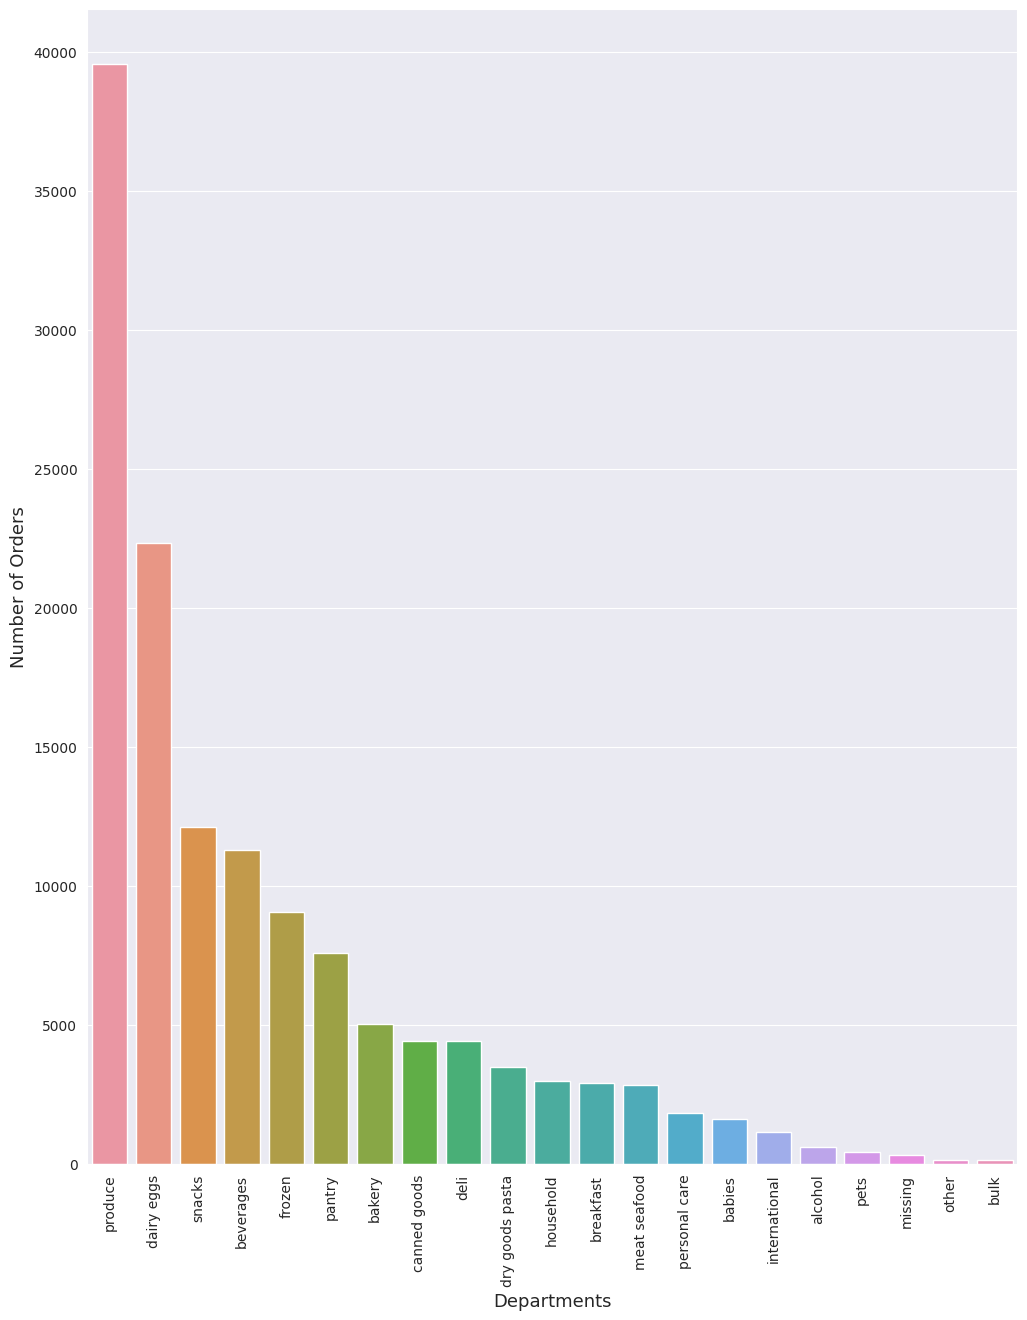

In [84]:
grouped  = grouped.groupby(['department']).sum()['Total_orders'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

### Best Selling Aisles in each Department (number of Orders)

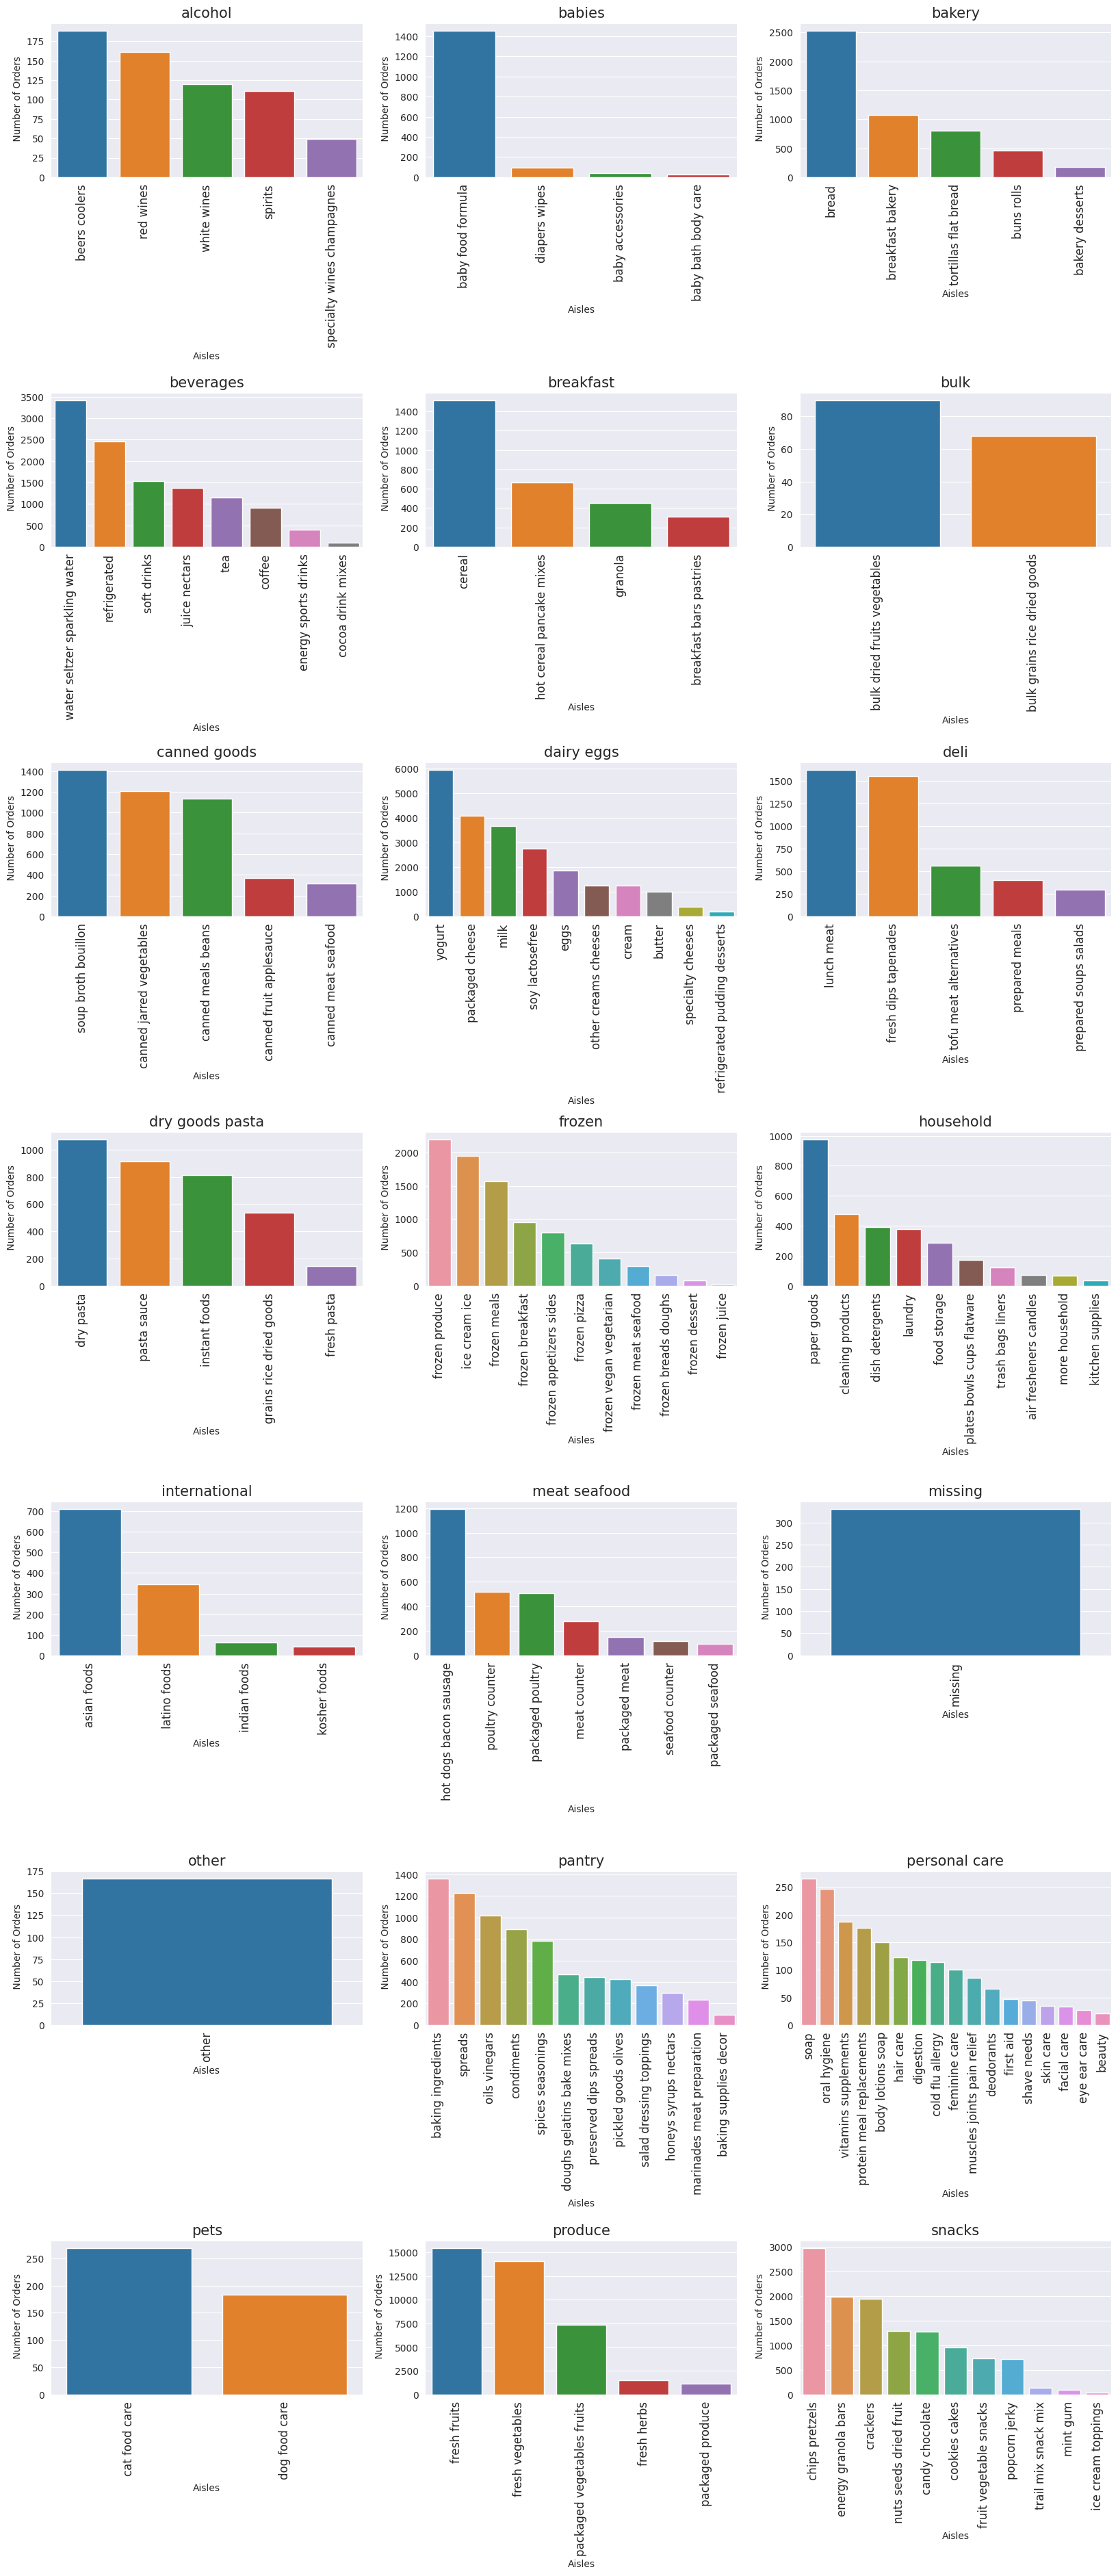

In [85]:
grouped = users_flow.groupby(["department", "aisle"])["order_id"].size().reset_index(name='Total_orders')
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(x=group.aisle, y=group.Total_orders , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of Orders")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

### Best Selling Aisles over all Departments.

In [86]:
grouped = users_flow.groupby("aisle")["order_id"].size().reset_index(name='Total_orders')
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True )
grouped.head(10)

,aisle,Total_orders,Ratio
50,fresh fruits,15470,0.115001
53,fresh vegetables,14072,0.104608
98,packaged vegetables fruits,7376,0.054832
133,yogurt,5958,0.044290
93,packaged cheese,4071,0.030263
83,milk,3660,0.027208
131,water seltzer sparkling water,3423,0.025446
25,chips pretzels,2973,0.022101
119,soy lactosefree,2736,0.020339
11,bread,2531,0.018815


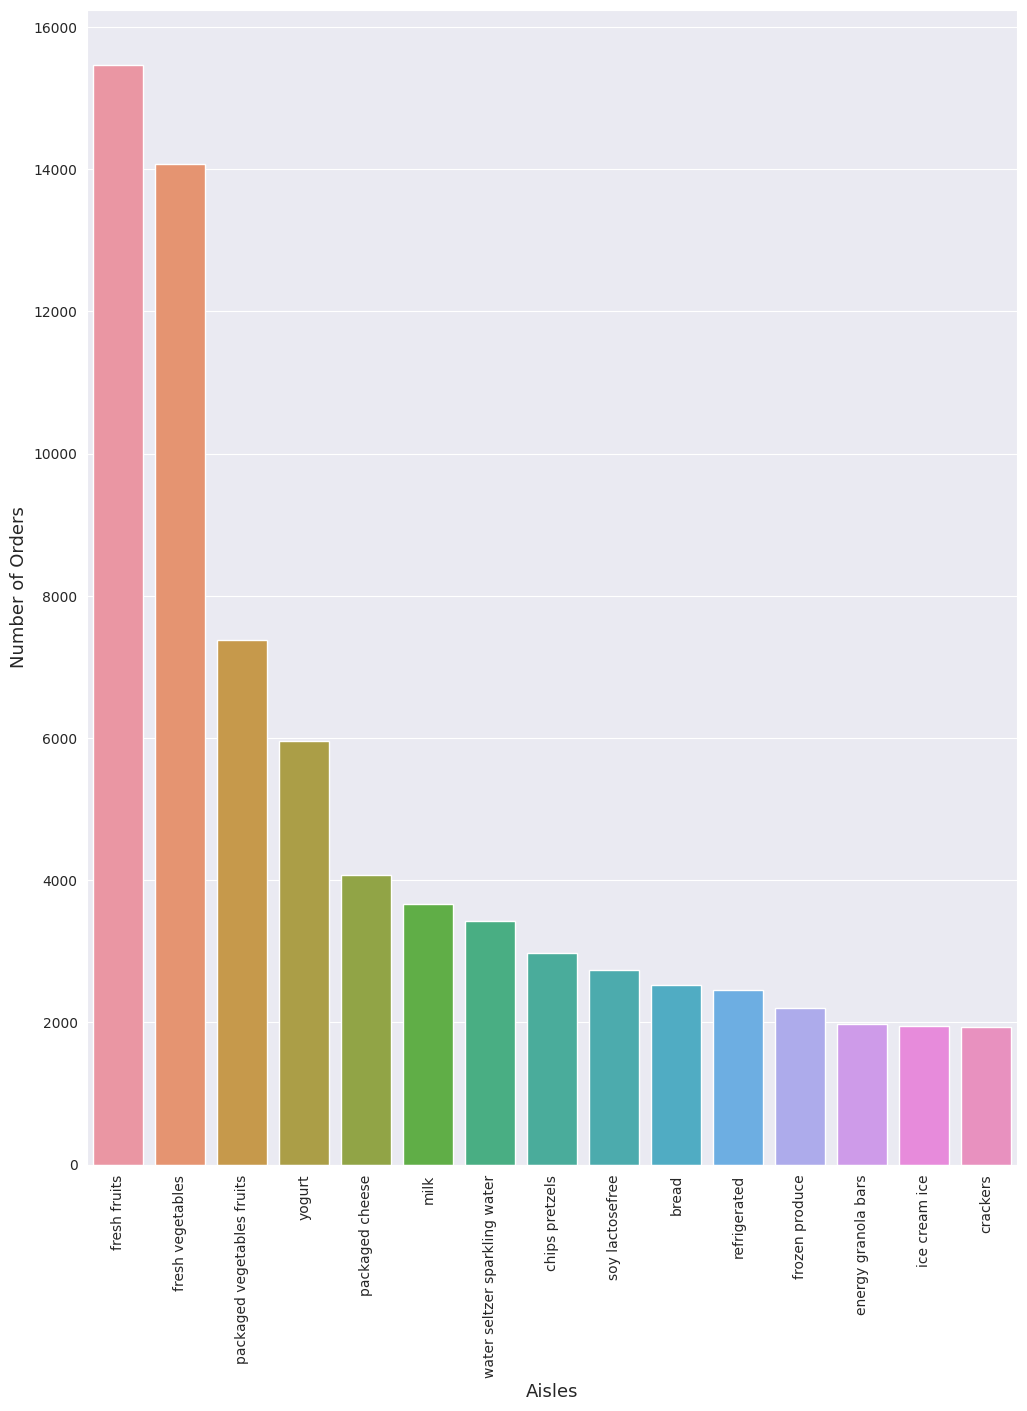

In [87]:
grouped  = grouped.groupby(['aisle']).sum()['Total_orders'].sort_values(ascending=False)[:15]

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

# Clustering algorithm

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Merge relevant datasets
data = orde.merge(or_prior, on='order_id').merge(proud, on='product_id').merge(dep, on='department_id').merge(aisles, on='aisle_id')

In [89]:
sample = data.sample(n=1000, random_state=42)
sample.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
43762,10490,4121,prior,11.0,2.0,17.0,18.0,48679.0,9.0,0.0,Organic Garnet Sweet Potato (Yam),83,4,produce,fresh vegetables
132173,1762,11323,prior,6.0,3.0,17.0,5.0,21162.0,6.0,0.0,Organic Mixed Berry Yogurt & Fruit Snack,92,18,babies,baby food formula
68561,62628,39720,prior,23.0,1.0,12.0,3.0,30820.0,3.0,0.0,"Cheese Alternative, Mozzarella",91,16,dairy eggs,soy lactosefree
68572,33603,40641,prior,34.0,2.0,17.0,13.0,27078.0,7.0,1.0,Avocado Oil Spread,91,16,dairy eggs,soy lactosefree
93152,35956,17738,prior,9.0,1.0,9.0,7.0,9076.0,33.0,1.0,Blueberries,116,1,frozen,frozen produce


In [90]:
# Extract customer-level features
customer_features = sample.groupby('user_id').agg({
    'order_number': 'max',
    'order_hour_of_day': 'mean',
    'days_since_prior_order': 'mean',
    'reordered':'max'
})

# Fill missing values with mean
customer_features.fillna(customer_features.mean(), inplace=True)

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(customer_features)

# Define the number of clusters
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each customer
cluster_labels = kmeans.labels_

# Add the cluster labels to the customer features
customer_features['cluster'] = cluster_labels

# Explore the cluster assignments
cluster_counts = customer_features['cluster'].value_counts()
print(cluster_counts)

0    499
1    427
Name: cluster, dtype: int64


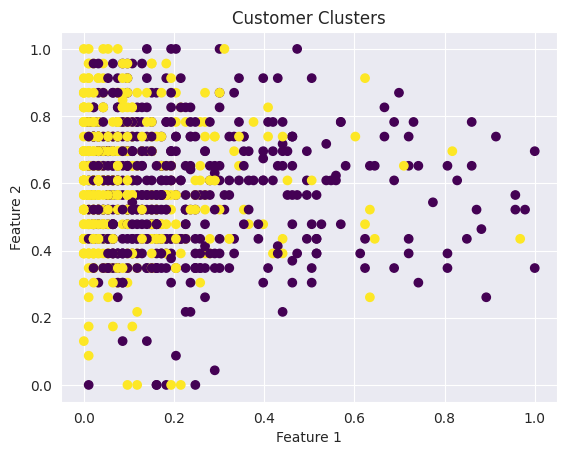

In [91]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Clusters')
plt.show()

In [92]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5799259594051566


In [93]:
# Merge the two datasets on the user_id column
merged_df = pd.merge(or_prior, orde, on='order_id')

merged_df = merged_df.drop('eval_set', axis=1)

# Print the merged dataset
merged_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,6,40462.0,1.0,0.0,22352,4.0,1.0,12.0,30.0
1,6,15873.0,2.0,0.0,22352,4.0,1.0,12.0,30.0
2,6,41897.0,3.0,0.0,22352,4.0,1.0,12.0,30.0
3,8,23423.0,1.0,1.0,3107,5.0,4.0,6.0,17.0
4,14,20392.0,1.0,1.0,18194,49.0,3.0,15.0,3.0
5,14,27845.0,2.0,1.0,18194,49.0,3.0,15.0,3.0
6,14,162.0,3.0,1.0,18194,49.0,3.0,15.0,3.0
7,14,2452.0,4.0,1.0,18194,49.0,3.0,15.0,3.0
8,14,8575.0,5.0,1.0,18194,49.0,3.0,15.0,3.0
9,14,41890.0,6.0,1.0,18194,49.0,3.0,15.0,3.0


In [94]:
#merged_df['eval_set'].nunique()
merged_df.loc[merged_df['reordered'] == 0].shape[0]

54461

In [95]:
rows_with_nans = merged_df[merged_df.isna().any(axis=1)]
merged_df.dropna(inplace=True)
merged_df.fillna(value=0, inplace=True)

In [96]:
X = merged_df.iloc[:, :-1]
y = merged_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
imputer = SimpleImputer(strategy="mean", missing_values=float('nan'))
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [98]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
y_pred = clf.predict(X_test)

In [100]:
from scipy.stats import mode

most_frequent_value = mode(y_pred, nan_policy='omit')[0][0]
y_pred[np.isnan(y_pred)] = most_frequent_value

most_frequent_value1 = mode(y_test, nan_policy='omit')[0][0]
y_test[np.isnan(y_test)] = most_frequent_value1

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9831902718168812


Random Forest 

In [102]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
PF_y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
RF_accuracy = accuracy_score(y_test, PF_y_pred)
print("Accuracy:", RF_accuracy)

Accuracy: 0.9626847877920839
